In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler #No normales con outlier
from sklearn.preprocessing import StandardScaler #Normales
from sklearn.preprocessing import MinMaxScaler #No normales sin outlier
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T6.1\housing data.csv", sep=",", header=None, engine="python", encoding="latin-1")

In [3]:
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


Nota: La limpieza de datos se ha hecho en el ejercicio 5, donde no hay fatos faltantes, no hay datos duplicados, no hay inconsistencias de datos, el conjunto de datos esta listo para ser usado. 

In [44]:
X=df.drop("MEDV",axis=1)
y=df.MEDV

Dividimos el conjunto en dos grupos (X y y)

In [5]:
from scipy.stats import shapiro
for x in X.columns.values:
    stat, p = shapiro(X[x])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.450, p=0.000
Probably not Gaussian
stat=0.556, p=0.000
Probably not Gaussian
stat=0.900, p=0.000
Probably not Gaussian
stat=0.275, p=0.000
Probably not Gaussian
stat=0.936, p=0.000
Probably not Gaussian
stat=0.961, p=0.000
Probably not Gaussian
stat=0.892, p=0.000
Probably not Gaussian
stat=0.903, p=0.000
Probably not Gaussian
stat=0.680, p=0.000
Probably not Gaussian
stat=0.815, p=0.000
Probably not Gaussian
stat=0.904, p=0.000
Probably not Gaussian
stat=0.477, p=0.000
Probably not Gaussian
stat=0.937, p=0.000
Probably not Gaussian


Todas las variables No son normales

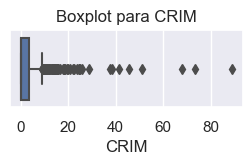

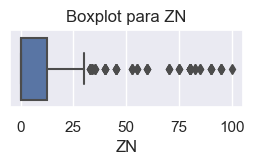

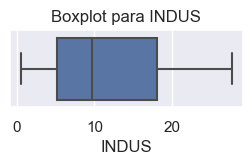

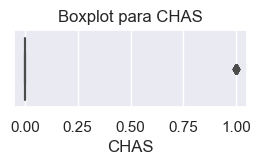

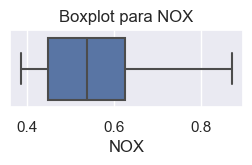

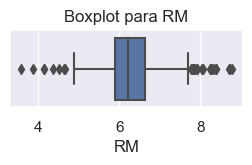

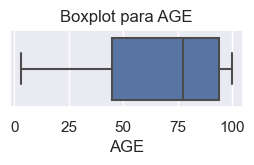

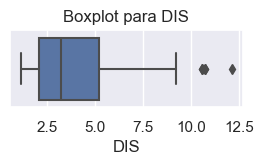

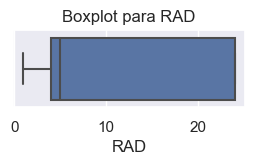

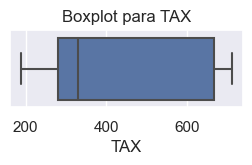

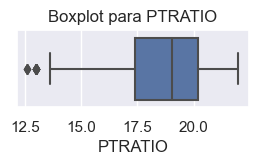

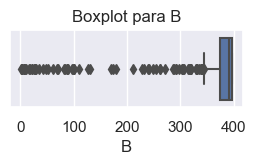

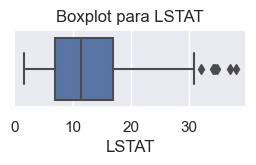

In [6]:
columns= X.columns
for i in columns:
    plt.figure(figsize=(3, 1))
    sns.set()
    sns.boxplot(x=X[i])
    plt.title(f'Boxplot para {i}')
    plt.show()

In [7]:
columnas_escalarr=["CRIM", "ZN", "DIS", "RM","PTRATIO", "B", "LSTAT"]
scaler = RobustScaler()
X[columnas_escalarr] = scaler.fit_transform(X[columnas_escalarr])

Para las variables No normales con Ouliers, usamos RobustScaler para normalizar

In [8]:
columnas_escalarmm=["INDUS", "AGE", "NOX", "TAX"]
scaler = MinMaxScaler()
X[columnas_escalarmm] = scaler.fit_transform(X[columnas_escalarmm])

Para las variables No normales sin Ouliers, usamos RobustScaler para normalizar.

In [9]:
dum_train = pd.get_dummies(X.RAD, prefix="RAD_", drop_first=True)
dum_train

,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0
504,0,0,0,0,0,0,0,0


Creamos Dummies para la variable categorica

In [10]:
X=pd.concat([X, dum_train], axis=1)
X=X.drop("RAD",axis=1)

Concatenamos las variables normalizadas con la categorica 

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD__2,RAD__3,RAD__4,RAD__5,RAD__6,RAD__7,RAD__8,RAD__24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,0,1,0,0,0,0,0,0


Obtenermos un conjunto de datos Preprocesado, con normalizaciones para variables numericas y dummy encoding para la variable categorica

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

Ahora que tenemos el conjunto de datos preprocesado, hacemos la division Train/test

#### Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

In [13]:
dtc = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
lr = LinearRegression()

¿ Por que se escogieron ?

dtc = DecisionTreeRegressor(random_state=42): Se escogio por que es uno de los modelos mas usados por su facilidad al interpretarse y visualizarse. no requiere normalizacion, ni asumen relaciones lineales y tiene parametros que me permiten ajustar su complejidad y evitar el sobreajuste. se ha usado el (random_state=42), para controlar las aleatoriedades de los datos y la reproducibilidad. 

rfr = RandomForestRegressor(n_estimators=100, random_state=42):  Este modelo es útil para problemas de regresión, donde se busca predecir valores numéricos a partir de variables predictoras. (n_estimators=100), Este parámetro especifica el número de árboles en el bosque aleatorio. En este caso, se ha establecido en 100. Aumentar el número de árboles generalmente mejora la robustez y el rendimiento del modelo, pero también puede aumentar el tiempo de entrenamiento. (random_state=42), lo utilizo para controlar la aleatoriedad y la reproductibilidad de los datos. 

lr = LinearRegression():  este modelo aborda, regresión lineal desde un enfoque estadístico que modela la relación lineal entre una variable dependiente (o respuesta) y una o más variables independientes (o características).

Cada uno de estos modelos cumple una o mas "features", que lo hacen atractivo para mi "target", la idea es que luego de dejorar los modelos y ejecutar metricas, darme cuenta cual de los tres es mas eficiente y se ajusta más a mis datos. 

In [14]:
models = [DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          LinearRegression()]

In [15]:
predictions = {}
for model in models:
    model.fit(X_train, y_train) #entrenamos modelos 
    y_pred = model.predict(X_test) #Predicciones
    predictions[type(model).__name__] = y_pred
df_predictions = pd.DataFrame(predictions)

Con un ciclo for hacemos predicciones para cada modelo de los tres escogidos.

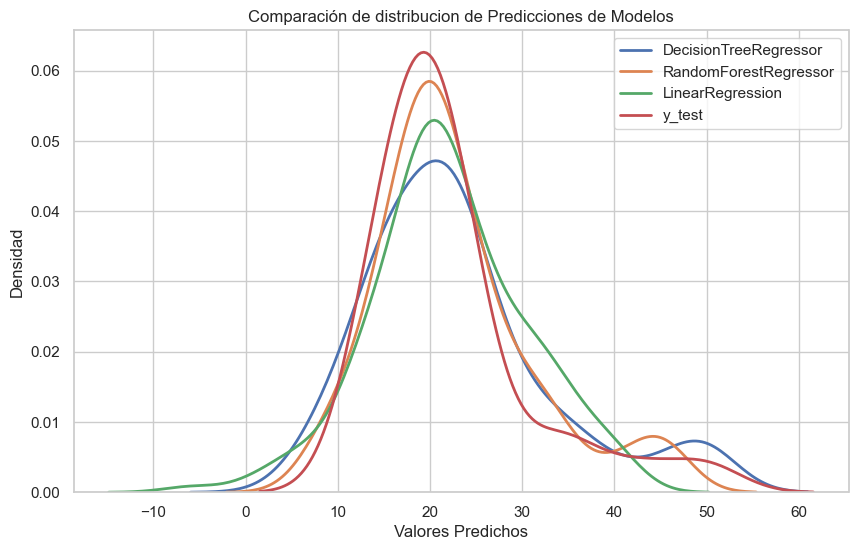

In [16]:
df_predictions['y_test'] = y_test
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for model_name in df_predictions.columns:
    sns.kdeplot(df_predictions[model_name], label=model_name, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de distribucion de Predicciones de Modelos')
plt.legend()
plt.savefig('comparacion_predicciones1.png')
plt.show()

En esta grafica podemos comparar los tres modelos para observar la distibucion de su predicción, respecto al y_test, en rojo, vemos como en la cumbre de la campana, RandomForestRegressor (Naranja), es aparentemente es el mas cercano y de comportamiento similar. luego el Linear regresor (verde), trata de hacer la misma forma, pero no logra un pico similar a y_test, el DecisionTreeRegressor (azul) varia mucho mas la forma erespecto a los demas.

#### Ejercicio 2
Compárales en base al MSE y al R2.

In [17]:
df_predictions0=df_predictions.drop('y_test',axis=1)

In [18]:
output1 = [] #almacenamos los resultados
for model in df_predictions0: #hacemos un ciclo for
    mse = mean_squared_error(y_test, df_predictions0[model]) #calculamos mse
    r2 = r2_score(y_test, df_predictions0[model]) #calculamos r2
    output1.append({
        'Model': model, 
        'MSE': mse, 
        'R^2': r2
    }) 
output_df1 = pd.DataFrame(output1) #creamos dataframe con resultados
output_df1.to_csv('metricas_modelos_estandar.csv', index=False)
output_df1

,Model,MSE,R^2
0,DecisionTreeRegressor,32.588862,0.652363
1,RandomForestRegressor,9.757128,0.895917
2,LinearRegression,28.414189,0.696895


##### Comparacion de metricas de modelos estandar: 

MSE(Mean Squared Error):: El modelo con mas ajuste (Las predicciones estan mas cerca de valores reales o sea a 0 ), a los datos (promedio de errrores al cuadrado), es: RandomForestRegressor con 9.75, luego el LinearRegression con 28.41 y luego DecisionTreeRegressor con 32.58

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor  con 0.89, luego LinearRegression con 0.69 y luego DecisionTreeRegressor con 0.65. 

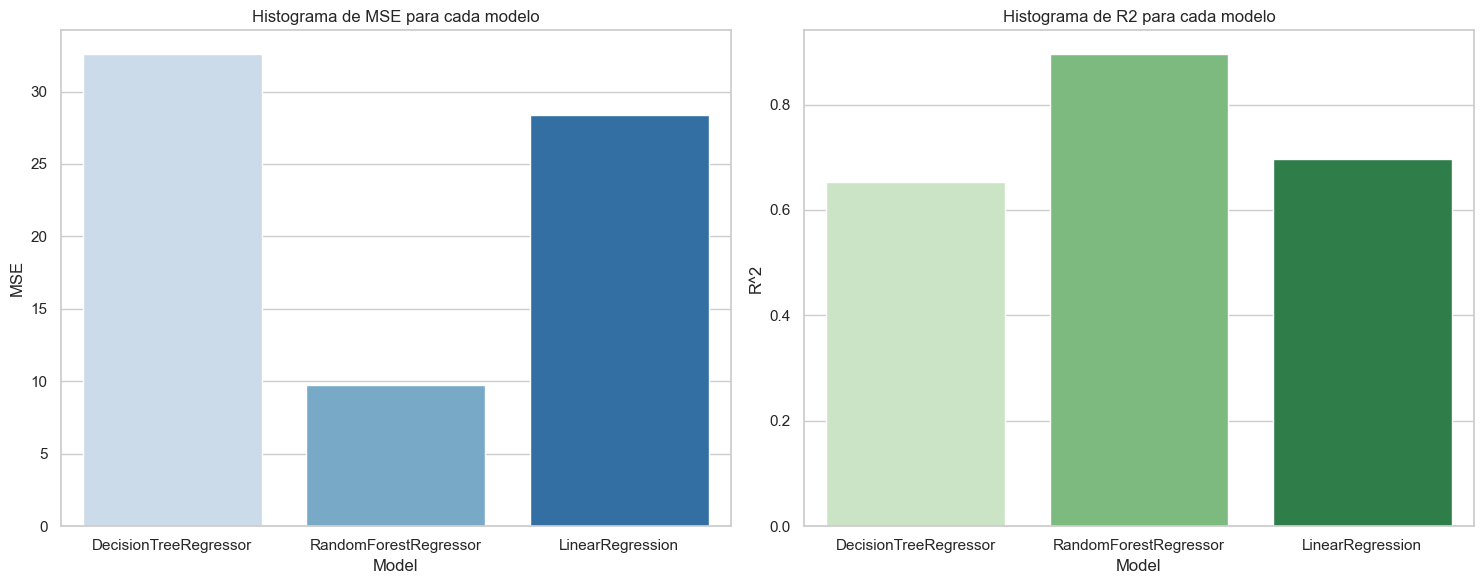

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x='Model', y='MSE', data=output_df1, palette="Blues", ax=axes[0])
axes[0].set_title('Histograma de MSE para cada modelo')
sns.barplot(x='Model', y='R^2', data=output_df1, palette="Greens", ax=axes[1])
axes[1].set_title('Histograma de R2 para cada modelo')
plt.tight_layout()
plt.savefig('MSE_R2_modelos_mejorados.png')
plt.savefig('comparacion metricas modelos estandar.png')
plt.show()

MSE= El modelo con valor mas cercano a 0, sera el que mas se ajuste de los datos, RandomForestRegressor es el que mas se ajusta.

R2= El modelo con el valor mas cercano a 1 es que que mas ajusta de los datos, RandomForestRegressor es el mas cercano a 1.

##### Conclusion: 

RandomForestRegressor nos da la mejores metricas para MSE (9.757128) Y R2 (0.895917). por lo tanto es el modelo que mas se ajusta a la prediccion y_test. nuestro mejor modelo para este caso. 

#### Ejercicio 3
Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

GridSearchCV nos permite buscar hiperparametros

In [20]:
dtc2 = DecisionTreeRegressor(random_state=42)
rfr2 = RandomForestRegressor(random_state=42)
lr2 = LinearRegression()

##### DecisionTreeRegressor Estandar  vs DecisionTreeRegressor mejorando hiparametros

##### DecisionTreeRegressor Estandar 

In [21]:
dtc2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

##### DecisionTreeRegressor mejorando hiparametros

In [22]:
parametros_decision_tree = {
    'ccp_alpha': [0.0, 0.01],
    'criterion': ['absolute_error', 'squared_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10],
    'max_leaf_nodes': [None, 10, 50],
    'min_impurity_decrease': [0.0, 0.01],
    'max_features': ['sqrt', 10],
    'min_samples_leaf': [1, 5],
    'min_weight_fraction_leaf': [0.0, 0.01],
    'min_samples_split': [2, 10],
}

grid_search_dt = GridSearchCV(estimator=dtc2, param_grid=parametros_decision_tree, cv=5, scoring='r2', error_score='raise')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
print(f'Best r2-score: {grid_search_dt.best_score_:.3f}\n')
print("Mejores parámetros para DecisionTreeRegressor:", grid_search_dt.best_params_)

Best r2-score: 0.751

Mejores parámetros para DecisionTreeRegressor: {'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


Los hiperparametros que fueron mejorados son los siguientes: 
- 'ccp_alpha': [0.0, 0.01], el mejor parametro es 0.0
- 'criterion': ['absolute_error', 'squared_error'], el mejor parametro es: 'absolute_error' 
- 'splitter': ['best', 'random'], el mejor parametro es: best
- 'max_depth': [None, 10], el mejor parametro es: None
- 'max_leaf_nodes': [None, 10, 50], el mejor parametro es: None
- 'min_impurity_decrease': [0.0, 0.01], el mejor parametro es: 0.01
- 'max_features': ['sqrt', 10], el mejor parametro es: 10
- 'min_samples_leaf': [1, 5], el mejor parametro es: 5
- 'min_weight_fraction_leaf': [0.0, 0.01], el mejor parametro es: 0.0
- 'min_samples_split': [2, 10], el mejor parametro es: 2

los hiperparametros que mejoraron frente a los por defecto fueron: 

- antes:  'max_features': None,
- mejorado:'max_features': 10

- antes: 'min_impurity_decrease': 0.0
- mejorado: 'min_impurity_decrease': 0.01

- antes: 'min_samples_leaf': 1,
- mejorado:  'min_samples_leaf': 5

##### RandomForestRegressorRegressor Estandar vs RandomForestRegressorRegressor mejorando hiparametros

##### RandomForestRegressorRegressor Estandar

In [23]:
rfr2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

 ##### RandomForestRegressorRegressor mejorando hiparametros

In [24]:
parametros_random_forest = {
    'max_depth': [None, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 100],
    'oob_score': [True, False],
}
grid_search_rf = GridSearchCV(estimator=rfr2, param_grid=parametros_random_forest, cv=5, scoring='r2', error_score='raise')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f'Best r2-score: {grid_search_rf.best_score_:.3f}\n')
print("Mejores parámetros para RandomForestRegressor:", grid_search_rf.best_params_)

Best r2-score: 0.829

Mejores parámetros para RandomForestRegressor: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Los hiperparametros que fueron mejorados son los siguientes:

- 'max_depth': [None, 10], el mejor parametro es: None
- 'max_features': ['sqrt'], el mejor parametro es: sqrt
- 'min_samples_leaf': [1, 5], el mejor parametro es: 1
- 'min_samples_split': [2, 5], el mejor parametro es: 2
- 'n_estimators': [50, 100], el mejor parametro es: 100
- 'oob_score': [True, False], el mejor parametro es: True

los hiperparametros que mejoraron frente a los por defecto fueron:

- 'max_features': ['sqrt']
- 'oob_score': True

##### LinearRegression Estandar vs LinearRegression mejorando hiparametros

##### LinearRegression Estandar

In [25]:
lr2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

##### LinearRegression mejorando hiparametros

In [26]:
parametros_lg = {
    "fit_intercept":[True,False], 'positive':[False,True], "copy_X":[True, False], "n_jobs":[1,2,4,7,9, None]
}
grid_search_lg = GridSearchCV(estimator=lr2, param_grid=parametros_lg, cv=5, scoring='r2')
grid_search_lg.fit(X_train, y_train)
best_lg_model = grid_search_lg.best_estimator_
print(f'Best r2-score: {grid_search_lg.best_score_:.3f}\n')
print("Mejores parámetros para Linear Regressor:", grid_search_lg.best_params_)

Best r2-score: 0.727

Mejores parámetros para Linear Regressor: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


Los hiperparametros que fueron mejorados son los siguientes:

- "copy_X":[True, False],  el mejor parametro es: True
- "fit_intercept":[True,False],  el mejor parametro es: True
- "n_jobs":[1,2,4,7,9, None],  el mejor parametro es: 1
- 'positive':[False,True],  el mejor parametro es: False

los hiperparametros que mejoraron frente a los por defecto fueron:
- 'n_jobs': 1

##### Conclusiones. 

- El modelo con el mejor Best r2-score: fue Random Forest Regressor con 0.829
- Los hiperparametros estandar pueden cambiar sus valores para mejorar su rendimiento.
- Algunos hiperparametros son comunes en los modelos. 

In [28]:
best_models = [('DecisionTreeRegressor', best_dt_model),
               ('RandomForestRegressor', best_rf_model),
               ('LinearRegression', best_lg_model)]

In [29]:
predictions2 = {}
for model in best_models:
    y_pred = model[1].predict(X_test)
    predictions2[model[0]] = y_pred
df_predictions2 = pd.DataFrame(predictions2)

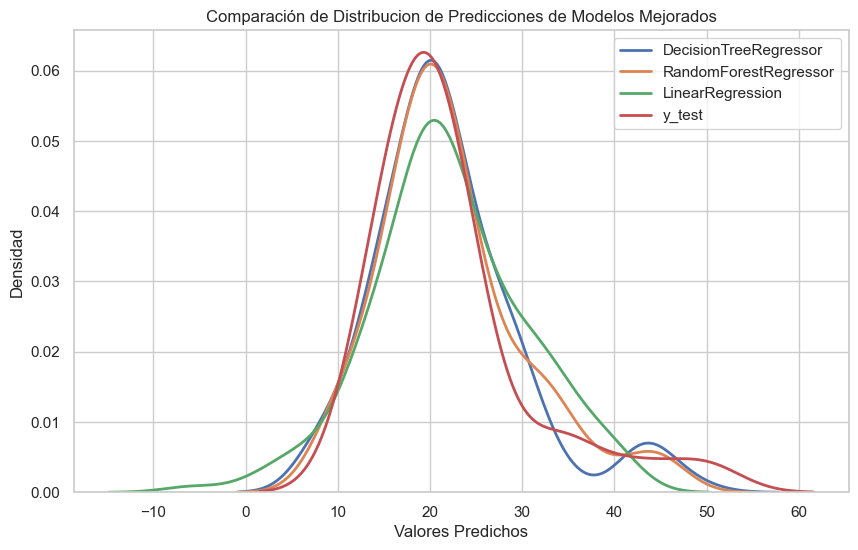

In [30]:
df_predictions2['y_test'] = y_test
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for model_name in df_predictions2.columns:
    sns.kdeplot(df_predictions2[model_name], label=model_name, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de Distribucion de Predicciones de Modelos Mejorados')
plt.legend()
plt.savefig('comparacion_predicciones2.png')
plt.show()

En esta grafica podemos comparar los tres modelos mejorados para observar la distribución de su predicción, respecto al y_test, en rojo, se observa que el DecisionTreeRegressor (azul) y RandomForestRegressor (Naranja), son muy similares en la distribución de las predicciones y las mas cercanas a y_tes, y  el Linear regresor (verde) en cambio tiene una distribución menos acertada a y_test.

##### Comparacion Grafica de Distribución de Predicciones de Modelos Estandar  y  Mejorados:

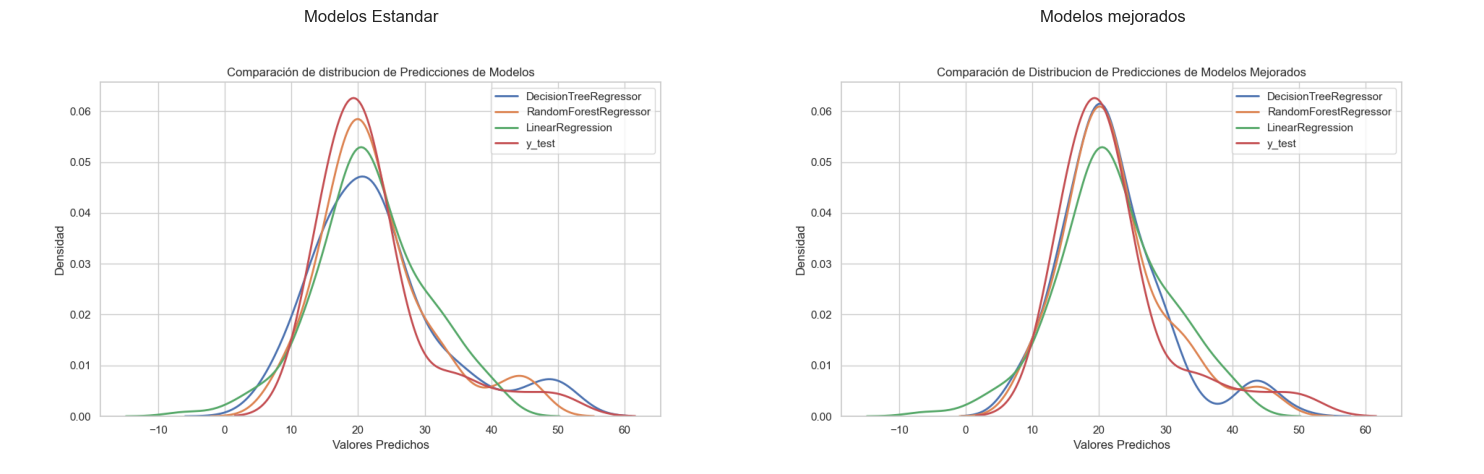

In [31]:
imagen1 = mpimg.imread('comparacion_predicciones1.png')
imagen2 = mpimg.imread('comparacion_predicciones2.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

Se observa que la distribución de las predicciones de DesicionTreeRegressor (azul),es la que tiene una mejoria significativa frente a su distribucion con el modelo estandar, siendo con los hiperparametros mejorados muy similar al RandomForestRegressor (Naranja), que fue el mejor modelo en la grafica de los modelos estandar, por tanto los mejores modelos graficamente son estos dos. El LinearRegressor, sin embargo parece que no mejoro su distribucion frnete al modelo estandar. 

In [32]:
df_predictions22=df_predictions2.drop('y_test',axis=1)

In [33]:
output2 = [] #almacenamos los resultados
for model in df_predictions22: #hacemos un ciclo for
    mse = mean_squared_error(y_test, df_predictions22[model]) #calculamos mse
    r2 = r2_score(y_test, df_predictions22[model]) #calculamos r2
    output2.append({
        'Model': model, 
        'MSE': mse, 
        'R^2': r2
    }) #configuramos una tabla para mostrar resultados.
output_df2 = pd.DataFrame(output2) #creamos dataframe con resultados
output_df2.to_csv('metricas_modelos_mejorados.csv', index=False)
output_df2

,Model,MSE,R^2
0,DecisionTreeRegressor,23.043817,0.754183
1,RandomForestRegressor,12.877447,0.862632
2,LinearRegression,28.414189,0.696895


##### Comparacion de metricas de modelos mejorados: 

MSE(Mean Squared Error):: El modelo con mas ajuste (Las predicciones estan mas cerca de valores reales o sea a 0 ), a los datos (promedio de errrores al cuadrado), es: RandomForestRegressor con 12.87, luego el DecisionTreeRegressor con 23.04, y por ultimo el LinearRegression con 28.41

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor  con 0.86,  luego el DecisionTreeRegressor con 0.75, y por ultimo el LinearRegression con 0.69.

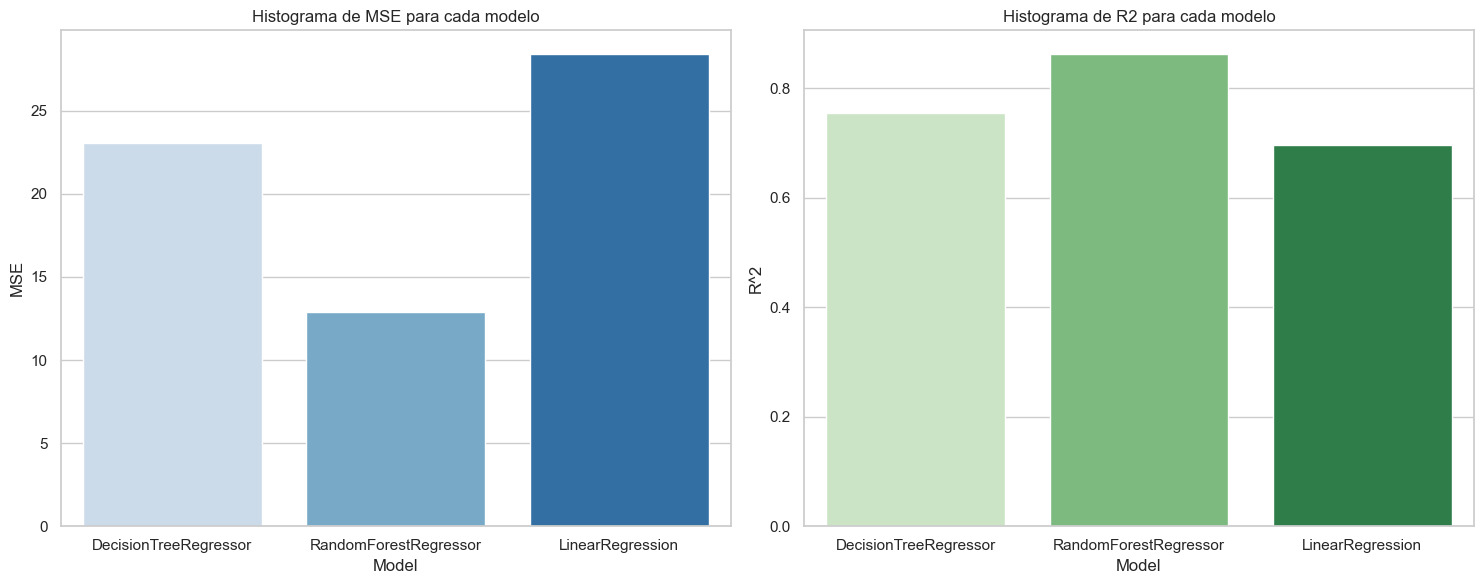

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x='Model', y='MSE', data=output_df2, palette="Blues", ax=axes[0])
axes[0].set_title('Histograma de MSE para cada modelo')
sns.barplot(x='Model', y='R^2', data=output_df2, palette="Greens", ax=axes[1])
axes[1].set_title('Histograma de R2 para cada modelo')
plt.tight_layout()
plt.savefig('comparacion metricas modelos mejorados.png')
plt.show()

MSE= El modelo con valor mas cercano a 0, sera el que mas se ajuste de los datos, RandomForestRegressor es el que mas se ajusta

R2= El modelo con el valor mas cercano a 1 es que que mas ajusta de los datos, RandomForestRegressor es el mas cercano a 1

##### Comparacion  de Metricas  de Modelos Estandar  y  Mejorados:

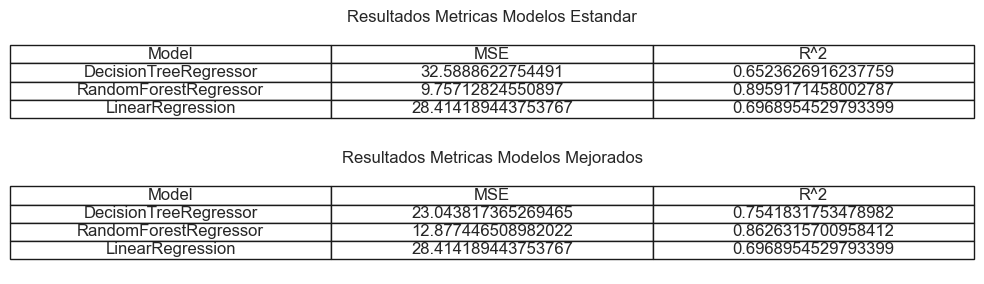

In [35]:
resultados1 = pd.read_csv('metricas_modelos_estandar.csv')
resultados2 = pd.read_csv('metricas_modelos_mejorados.csv')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 3))  # 2 filas, 1 columnas
plt.subplots_adjust(top=0.8)
# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Resultados Metricas Modelos Estandar')

# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Resultados Metricas Modelos Mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

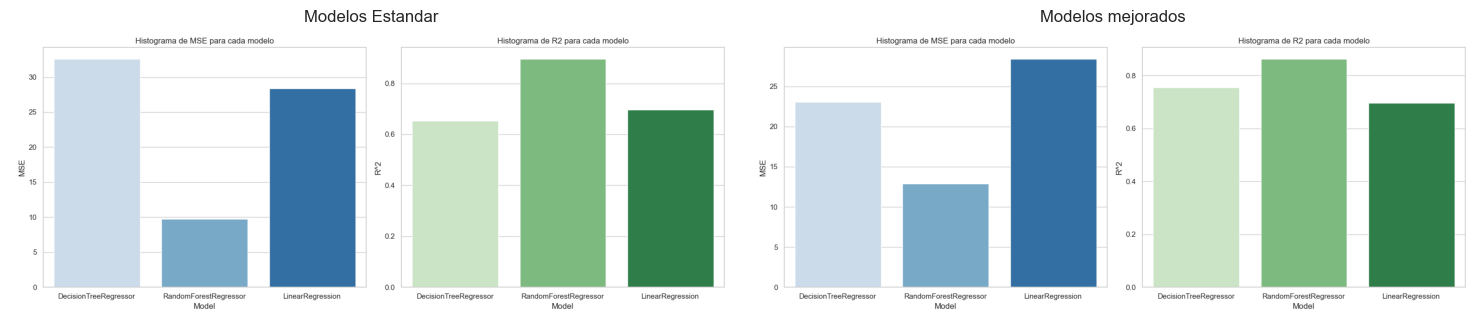

In [36]:
imagen1 = mpimg.imread('comparacion metricas modelos estandar.png')
imagen2 = mpimg.imread('comparacion metricas modelos mejorados.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

##### Comparacion de metricas de modelos estandar y modelos  mejorados:

Se observa que al ser mejorados los modelos, el modelo que logro mejorar sus metricas respecto a su modelo estandar, fue DesicionTreeRegressor, en las dos metricas, MSE (32.58) a (23.04) y R2 (0.65) a (0.75).

El RandomForestRegressor, desmejor sus metrica MSE (9.75) a (12.87) y R2 (0.89) a (0.86). esto podria deberse a un Overfitting, del modelo, aumenta el MSE y disminuye el R2. igualmente sigue siendo el mejor modelo.

por que desmejoro? 

Desmejoro por que las opciones que le di al hiperparametro no fueron mejores a las que trae el modelo por defecto, por tanto el escogio los mejores hiperparametros que yo le propuse y esto fue lo que genero que mi modelo disminuyera su rendimiento. 

'max_features': ['sqrt'], le propuse a mi modelo esta opcion en vez de la de por defecto 1.0 y como resultado es mejor 1.0, esto contribuyo a que 'oob_score': True, tambien me diera distinto a la opcion por defecto, en conclusión este modelo es mejor por defecto en ocmparacion sin las mejoras que le he propuesto.

El LinearRegression, mantuvo las metricas MSE (28.42) a (28.41) y R2 (0.69) a (0.69) 

##### CONCLUSIÓN: 
Los hiperparametros, buscan mejorar el rendimiento de los modelos, reflejado en sus metricas MSE Y R2, pero se debe controlar esta busqueda de hiperparametros, por que podria ajustarse demasiado a los datos y hacer lo contrario, demejorar el modelo.

El mejor modelo sigue siendo el RandomForestRegressor.

#### Ejercicio 4
Compara su rendimiento empleando la aproximación Train/test o empleando todos los datos (validación interna).

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cv_results = []
for model_name, model in best_models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name} - Mean Cross-Validation Score: {np.mean(scores)}")
    print(scores)
    cv_results.append(scores)

DecisionTreeRegressor - Mean Cross-Validation Score: 0.5499820086531872
[0.71128984 0.77722304 0.72807704 0.31670783 0.2166123 ]
RandomForestRegressor - Mean Cross-Validation Score: 0.6252211874302737
[0.7067372  0.83279975 0.74017296 0.50413348 0.34226255]
LinearRegression - Mean Cross-Validation Score: 0.3532759243958842
[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


Con la validacion cruzada vemos que el mejor modelo es RandomForestRegressor con una puntuacion de:  Mean Cross-Validation Score: 0.6252

In [89]:
model_names = []
mean_scores_list = []
std_dev_scores_list = []

cv_results = np.array(cv_results)
mean_scores = np.mean(cv_results, axis=1)
std_dev_scores = np.std(cv_results, axis=1)
for i, (model_name, _) in enumerate(best_models):
    model_names.append(model_name)
    mean_scores_list.append(mean_scores[i])
    std_dev_scores_list.append(std_dev_scores[i])
df_results = pd.DataFrame({
    'Model': model_names,
    'Mean Cross-Validation Score': mean_scores_list,
    'Standard Deviation': std_dev_scores_list
})
print(df_results)
df_results.to_csv('Cross validation modelos mejorados con hiperparametros.csv', index=False)

                   Model  Mean Cross-Validation Score  Standard Deviation
0  DecisionTreeRegressor                     0.549982            0.234490
1  RandomForestRegressor                     0.625221            0.177581
2       LinearRegression                     0.353276            0.376568


A pesar de que el Cross validation nos muestra el mejor puntaje, para el modelo Random Forest Regressor debemos asegurarnos del comportamiento de las metricas para tomar la decision definitiva, de que modelo es mejor, por ellos he buscado la Mean Cross-Validation Score y la desviacion estandar de las metricas, para cada modelo, y logramos comprovar que el mejor modelo es igualmente, el Random Forest Regressor, con una media de Cross validation de 0.6252 y una desviacion estandar de  0.1775, lo que significa que el comportamiento de los datos, tuvo la dispersion mas baja a la media del conjunto de datos, si lo comparamos con los otros dos modelos que tuvieron una desviacion estandar mas grande.  

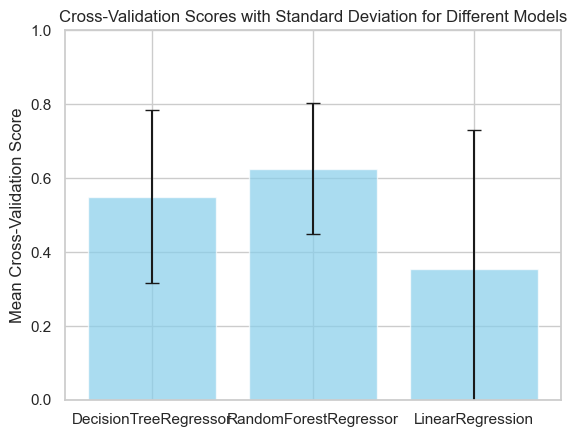

In [90]:
model_names = ['DecisionTreeRegressor', 'RandomForestRegressor', 'LinearRegression']
mean_scores = np.array([0.5499820086531872, 0.6252211874302737, 0.3532759243958842])
std_dev_scores = np.array([0.234490404525334, 0.17758122181149116, 0.3765678393326205])

# Crear un gráfico de barras con barras de error
fig, ax = plt.subplots()

# Barra de error
ax.bar(model_names, mean_scores, yerr=std_dev_scores, capsize=5, alpha=0.7, color='skyblue')

# Configuraciones del gráfico
ax.set_ylabel('Mean Cross-Validation Score')
ax.set_title('Cross-Validation Scores with Standard Deviation for Different Models')
ax.set_ylim(0, 1)  # Ajusta el rango del eje y según tus necesidades

# Mostrar el gráfico
plt.show()

Este grafico de barra de error, nos muestra las puntuaciones de Mean Cross-Validation Score de cada modelo (barras azules) y  la linea de error (negra), nos muestra la Standard Deviation de cada modelo, el centro de la barra de error siempre sera el limite de los datos (o borde con Gráficos de Barras). esto nos muestra la dispersion para cada modelo y se identifica que el modelo con menor dispersión es el RandomForestRegressor.

Conclusión: con la Cross validation comprovamos que, el mejor modelo es RandomForestRegressor, con una media de Cross validation de 0.6252 y una desviacion estandar de  0.1775, la mas baja de los tres modelos estudiados. 

con la cross validation nos dimos cuenta que el mejor modelo es RandomForestRegressor, sin embargo queda la duda de si este modelo es mejor sin la busqueda de hiperparametros ya que dio unosmejores puntajes MSE Y R2, sin la busqueda de hiperparametros, para ello hare otra Cross validation. 

In [85]:
best_models2 = [('DecisionTreeRegressor', best_dt_model),
               ('RandomForestRegressor', rfr),
               ('LinearRegression', best_lg_model)]

En este diccionario tengo los modelos con las mejores puntuaciones con o sin parametros. 

In [86]:
cv_results00 = []
for model_name, model in best_models2:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name} - Mean Cross-Validation Score: {np.mean(scores)}")
    print(scores)
    cv_results00.append(scores)

DecisionTreeRegressor - Mean Cross-Validation Score: 0.5499820086531872
[0.71128984 0.77722304 0.72807704 0.31670783 0.2166123 ]
RandomForestRegressor - Mean Cross-Validation Score: 0.6270701879637265
[0.77231143 0.85753737 0.74161095 0.4693153  0.29457589]
LinearRegression - Mean Cross-Validation Score: 0.3532759243958842
[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


Efectivamente con el cross validation el mejor modelo es RandomForestRegressor pues su metrica mejoro de  Mean Cross-Validation Score: 0.625221 a 0.62707018 , pues se uso el modelo sin hiperparametros, sin embargo vamos a ver la desviacion estandar para saber si efectivamente el mejor modelo es RandomForestRegressor sin hiperparametros. los otros modelos se mantuvieron igual. 

In [93]:
model_names = []
mean_scores_list = []
std_dev_scores_list = []

cv_results00 = np.array(cv_results00)
mean_scores = np.mean(cv_results00, axis=1)
std_dev_scores = np.std(cv_results00, axis=1)
for i, (model_name, _) in enumerate(best_models2):
    model_names.append(model_name)
    mean_scores_list.append(mean_scores[i])
    std_dev_scores_list.append(std_dev_scores[i])
df_results = pd.DataFrame({
    'Model': model_names,
    'Mean Cross-Validation Score': mean_scores_list,
    'Standard Deviation': std_dev_scores_list
})
print(df_results)
df_results.to_csv('Cross validation mejores modelos con o sin parametros.csv', index=False)

                   Model  Mean Cross-Validation Score  Standard Deviation
0  DecisionTreeRegressor                     0.549982            0.234490
1  RandomForestRegressor                     0.627070            0.211078
2       LinearRegression                     0.353276            0.376568


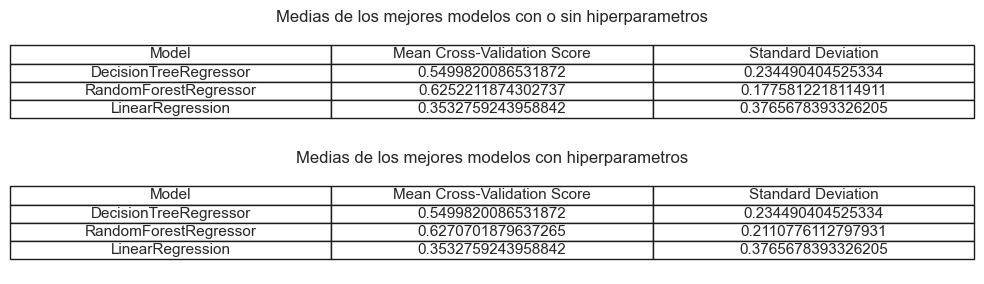

In [94]:
resultados1 = pd.read_csv('Cross validation modelos mejorados con hiperparametros.csv')
resultados2 = pd.read_csv('Cross validation mejores modelos con o sin parametros.csv')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 3))  # 2 filas, 1 columnas
plt.subplots_adjust(top=0.8)
# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Medias de los mejores modelos con o sin hiperparametros')

# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Medias de los mejores modelos con hiperparametros')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

El RandomForestRegressor sin hiperparametros, tuvo un mejor puntaje Mean Cross-Validation Score (0.6252), desviacion estandar de (0.1775), y RandomForestRegressor con hiperparametros Mean Cross-Validation Score(0,6270), desviacion estandar de (0.2110). mientras el Mean Cross-Validation Score, disminuyo muy poco, las desviación estandar si tuvo un aumento significativo. 

##### Conclusion: 
aunque el RandomForestRegressor con hiperparametros, disminuyo su Mean Cross-Validation Score frente al RandomForestRegressor sin hiperparametros, la desciacion estandar es mas baja en RandomForestRegressor con hiperparametros. por tanto este seria nuestro mejor modelo. 

##### Ejercicio 5
No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [95]:
X_train_1 = X_train.drop('RM', axis=1)
X_test_1 = X_test.drop('RM', axis=1)

Eliiminamos la variable RM del X_train y X_test, para las predicciones.

In [96]:
best2_models = [('DecisionTreeRegressor', best_dt_model),
               ('RandomForestRegressor', best_rf_model),
               ('LinearRegression', best_lg_model)]

In [97]:
predictions3 = {}
for model_name, model in best2_models:
    model.fit(X_train_1, y_train)
    y_pred = model.predict(X_test_1)
    predictions3[model_name] = y_pred
df_predictions3 = pd.DataFrame(predictions3)

Hacemos las predicciones para cada modelo mejorado con X_train y X_test sin la variable RM

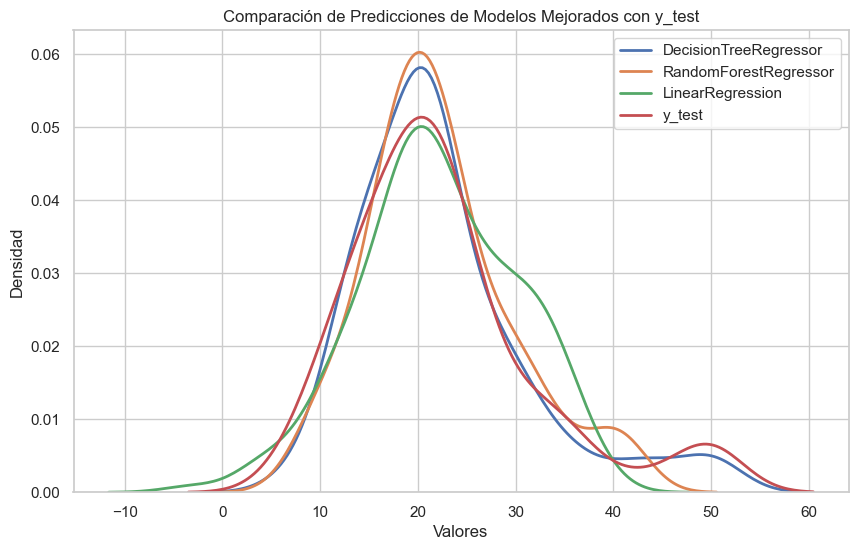

In [98]:
predictions3['y_test'] = y_test
df_predictions3 = pd.DataFrame(predictions3)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for column in df_predictions3.columns:
    sns.kdeplot(df_predictions3[column], label=column, linewidth=2)
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.title('Comparación de Predicciones de Modelos Mejorados con y_test')
plt.legend()
plt.savefig('predicciones de modelos sin RM.png')
plt.show()

Al eliminar la variable RM, el y_test cambio su distribución y ahora podemos decir que los modelos que mas se acercan a su distribucion son LinearRegression o DecisionTreeRegressor. por tanto el RandomForestRegressor ya no seria el mejor modelo para nuestras predicciones.

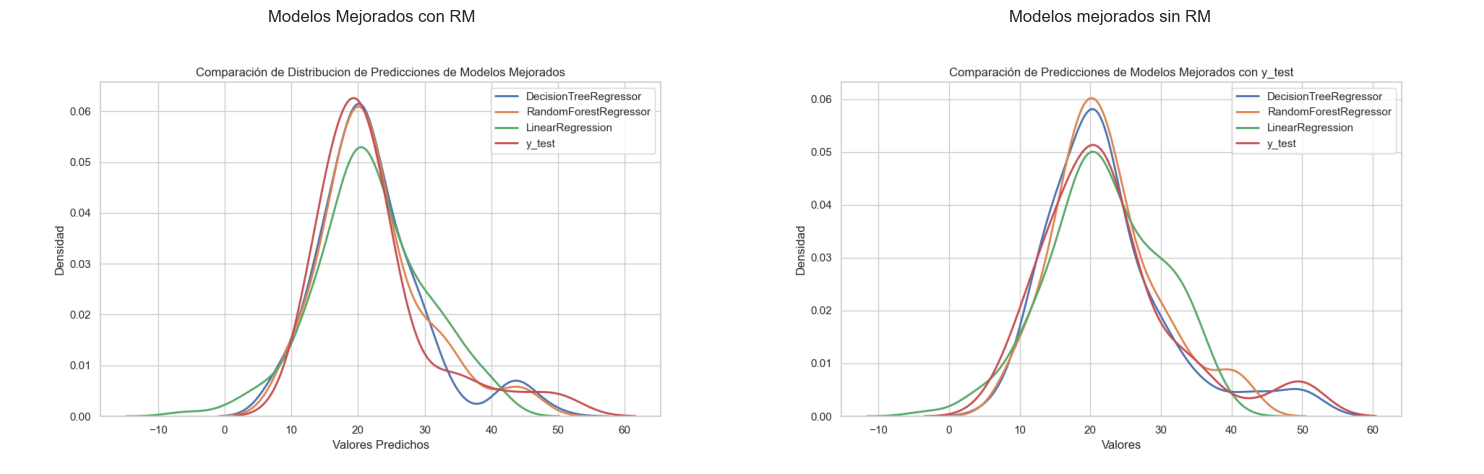

In [99]:
imagen1 = mpimg.imread('comparacion_predicciones2.png')
imagen2 = mpimg.imread('predicciones de modelos sin RM.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Mejorados con RM')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados sin RM ')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

Vemos graficamente las predicciones de los modelos mejorados con y sin la variabel RM, sin la variabel RM, el comportamiento de los modelos cambia y ahora parece que el mejor modelo fuera LinearRegression o DecisionTreeRegressor y el menos probable el RandomForestRegressor. 

In [100]:
df_predictions33=df_predictions3.drop('y_test',axis=1)

In [101]:
output3 = [] #almacenamos los resultados
for model in df_predictions33: #hacemos un ciclo for
    mse = mean_squared_error(y_test, df_predictions33[model]) #calculamos mse
    r2 = r2_score(y_test, df_predictions33[model]) #calculamos r2
    output3.append({
        'Model': model, 
        'MSE': mse, 
        'R^2': r2
    }) #configuramos una tabla para mostrar resultados.
output_df3 = pd.DataFrame(output3) #creamos dataframe con resultados
output_df3.to_csv('metricas_modelos_mejorados sin RM.csv', index=False)
output_df3

,Model,MSE,R^2
0,DecisionTreeRegressor,25.538099,0.727576
1,RandomForestRegressor,18.873303,0.798672
2,LinearRegression,31.548212,0.663464


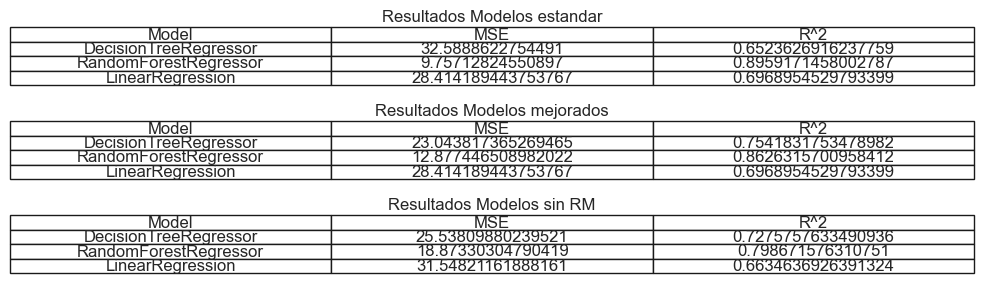

In [102]:
resultados1 = pd.read_csv('metricas_modelos_estandar.csv')
resultados2 = pd.read_csv('metricas_modelos_mejorados.csv')
resultados3 = pd.read_csv('metricas_modelos_mejorados sin RM.csv')

# Configurar la figura y los subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 3))  # 1 fila, 3 columnas

# Ajustar la disposición para acercar la tabla a los títulos
plt.subplots_adjust(top=0.8)

# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Resultados Modelos estandar')

# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Resultados Modelos mejorados')

# Mostrar la tabla 3 en el tercer subplot
axs[2].axis('off')  # Desactivar ejes si es necesario
axs[2].table(cellText=resultados3.values,
             colLabels=resultados3.columns,
             cellLoc='center',
             loc='center')
axs[2].set_title('Resultados Modelos sin RM')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

##### Comparacion de rendimiento de modelos con X_train y X_test sin variable con y sin RM:

El rendimiento de los modelos disminuyo para RandomForestRegressor que era el mejor modelo con la variabel RM y para LinearRegression, pero para DecisionTreeRegressor mejoro las metricas, aunque el RandomForestRegressor, sigue teniendo las mejores metricas MSE Y r2

MSE(Mean Squared Error):: El modelo con mas ajuste (menor valor), a los datos (promedio de errrores al cuadrado)(Las predicciones estan mas cerca de valores reales ) es: RandomForestRegressor es el mejor modelo con 18.87(empeoro), luego el DecisionTreeRegressor con MSE de 25.53 (empeoro) y luego LinearRegression con 31.54 (empeoro)

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor, sigue siendo el mejor modelo con 0.79 (empeoro), luego DecisionTreeRegressor, con 0.72 (empeoro) y por ultimo LinearRegression con 0.66 (empeoro).  

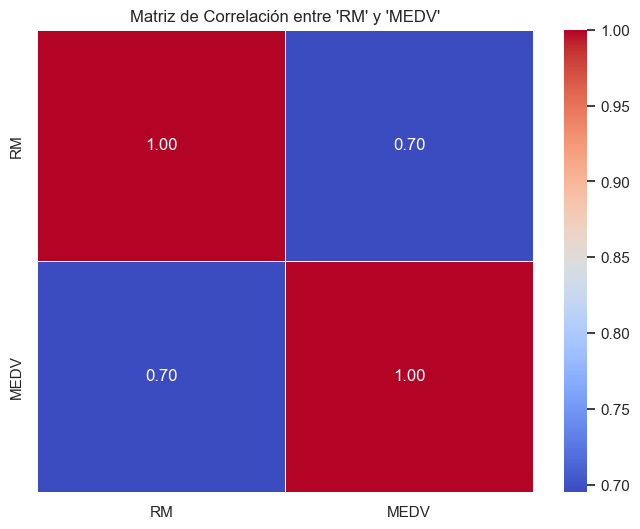

In [108]:
df = pd.DataFrame(df)
correlation_matrix = df[['RM', 'MEDV']].corr()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación entre 'RM' y 'MEDV'")
plt.show()

##### ¿Por que empeora el modelo?

El modelo empeora al eliminar la variable RM, puesto que existe una alta correlacion entre RM Y MEDV, por tanto los modelos necesitan de esta variable para que su rendimiento y sus predicciones sean mas exactas a la hora de predecir MEDV. esta correoalcion entre las dos variables, se debe a que RM (Numero media de habitaciones por vivienda), es determinante a la hora de saber el precio de una vivienda MEDV ( Valor medio de viviendas ocupadas por sus propietarios en miles de dólares), pues el numero de habitaciones, nos da idea de que tan grande son las viviendas, posibles m2 de la vivienda,  y así hallar el valor de mercado de la vivienda.  

##### Conclusion: 
La correlacion entre variables es un determinante a la hora de modelos de prediccion, saber cuales son las variables que mas afectan a la variabel dependiente, puede ayudar a tomar decisiones a la hora de crear modelos.